# **Stock Market Prediction Using Stacked LSTM**

Collecting the Stock data-GOOGL from 2020-01-01 to 2023-08-30

In [25]:
# Importing the yfinance package
import yfinance as yf

# Set the start and end date
start_date = '2020-01-01'
end_date = '2023-08-30'

# Set the ticker
ticker = 'GOOGL'

# Get the data
data = yf.download(ticker, start_date, end_date)

# Print the last 5 rows
print(data.tail())

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-23  130.179993  133.410004  129.869995  132.369995  132.369995   
2023-08-24  133.949997  134.250000  129.570007  129.779999  129.779999   
2023-08-25  129.539993  130.759995  127.250000  129.880005  129.880005   
2023-08-28  131.309998  132.539993  130.139999  131.009995  131.009995   
2023-08-29  132.240005  136.570007  132.240005  134.570007  134.570007   

              Volume  
Date                  
2023-08-23  27819700  
2023-08-24  28500700  
2023-08-25  26744800  
2023-08-28  20543300  
2023-08-29  43075600  


We will be dealing with the Close Price of the Stock only

In [26]:
df1=data.reset_index()['Close']

In [27]:
df1

0       68.433998
1       68.075996
2       69.890503
3       69.755501
4       70.251999
          ...    
916    132.369995
917    129.779999
918    129.880005
919    131.009995
920    134.570007
Name: Close, Length: 921, dtype: float64

### Visualizing the Stock Price over the consider time period

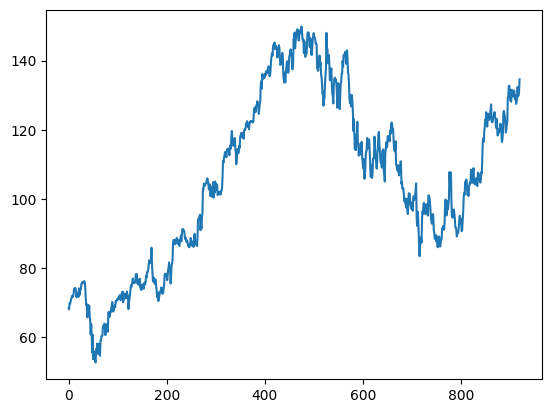

In [28]:
import matplotlib.pyplot as plt
plt.plot(df1)

Using MinMaxScaler to scale the closing price

In [29]:
import numpy as np

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [31]:
df1

array([[0.1619188 ],
       [0.15823308],
       [0.17691391],
       [0.17552403],
       [0.18063561],
       [0.1882284 ],
       [0.19294874],
       [0.19864722],
       [0.19378785],
       [0.19821993],
       [0.20386178],
       [0.21897518],
       [0.22038053],
       [0.22121439],
       [0.2216365 ],
       [0.21210313],
       [0.19437468],
       [0.20403678],
       [0.20722829],
       [0.20596714],
       [0.19491516],
       [0.22056064],
       [0.20141662],
       [0.20174605],
       [0.21714779],
       [0.21876412],
       [0.23397539],
       [0.23469606],
       [0.23910763],
       [0.23641026],
       [0.23915908],
       [0.23952456],
       [0.24231972],
       [0.23826341],
       [0.22100333],
       [0.18826437],
       [0.17099927],
       [0.1731355 ],
       [0.13426056],
       [0.14676935],
       [0.17099927],
       [0.14598176],
       [0.16856958],
       [0.13416277],
       [0.124372  ],
       [0.08321666],
       [0.11378329],
       [0.080

Splitting dataset into Train set and Test set into 65% -35% ratio

In [32]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [33]:
training_size,test_size

(598, 323)

### Reshaping the Train and Test set into sequencial data set with time step=100



In [34]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [35]:
# reshape into X=t,t+1,t+2,t+3...t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [36]:
X_train

array([[0.1619188 , 0.15823308, 0.17691391, ..., 0.18151588, 0.18485671,
        0.18904167],
       [0.15823308, 0.17691391, 0.17552403, ..., 0.18485671, 0.18904167,
        0.18848061],
       [0.17691391, 0.17552403, 0.18063561, ..., 0.18904167, 0.18848061,
        0.18743052],
       ...,
       [0.94447254, 0.91646939, 0.91525443, ..., 0.64901368, 0.61570338,
        0.63509961],
       [0.91646939, 0.91525443, 0.93446035, ..., 0.61570338, 0.63509961,
        0.62694066],
       [0.91525443, 0.93446035, 0.96475407, ..., 0.63509961, 0.62694066,
        0.61913171]])

Our Train and Test set is ready

In [37]:
X_train.shape,y_train.shape

((497, 100), (497,))

In [38]:
X_test.shape,ytest.shape

((222, 100), (222,))

### Reshaping input to be [samples, time steps, features] which is required for LSTM

In [39]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Create the Stacked LSTM model

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [41]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [42]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


## Traning the Model

In [43]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
8/8 [==============================] - 10s 460ms/step - loss: 0.1412 - val_loss: 0.0581
Epoch 2/100
8/8 [==============================] - 3s 324ms/step - loss: 0.0224 - val_loss: 0.0148
Epoch 3/100
8/8 [==============================] - 2s 223ms/step - loss: 0.0129 - val_loss: 0.0173
Epoch 4/100
8/8 [==============================] - 2s 229ms/step - loss: 0.0091 - val_loss: 0.0046
Epoch 5/100
8/8 [==============================] - 2s 227ms/step - loss: 0.0056 - val_loss: 0.0048
Epoch 6/100
8/8 [==============================] - 2s 231ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 7/100
8/8 [==============================] - 2s 231ms/step - loss: 0.0030 - val_loss: 0.0036
Epoch 8/100
8/8 [==============================] - 3s 382ms/step - loss: 0.0027 - val_loss: 0.0036
Epoch 9/100
8/8 [==============================] - 2s 228ms/step - loss: 0.0026 - val_loss: 0.0035
Epoch 10/100
8/8 [==============================] - 2s 228ms/step - loss: 0.0025 - val_loss: 0.0035
Epoch 11

## Evaluating the Model

In [44]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

7/7 [==============================] - 0s 46ms/step


In [45]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [46]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

114.49907496148978

In [47]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

107.88225588941687

Difference between the Train and Test data RMSE is quite small.Hence the model is generalized well

### Visualizing the predicted Stock price

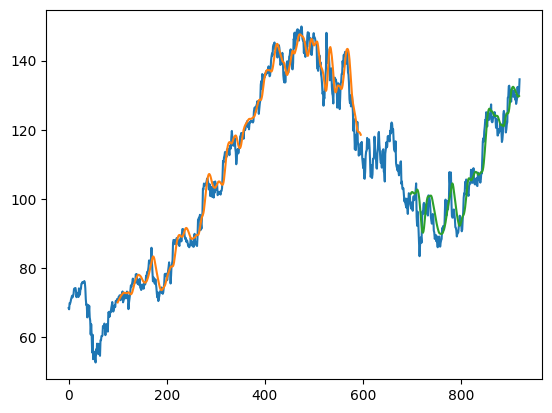

In [48]:
## Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [91]:
l=len(test_data)
l

323

## Predicting Stock Price for next 30 days in the future

Here we will take the previous 100 days' stock close price data from the test set as starting input to predict the stock price of day 1 in future.After getting the out put from day 1, we shift the time window by 1. By including  future day 1 price in the time window and excluding day 1 price of the previous time window and predict the price for day 2 in future. Like wise we do for 30 days in the future

In [92]:
x_input=test_data[l-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [93]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [94]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.80076504]
101
1 day input [0.55320081 0.54197893 0.5346693  0.56339311 0.57821832 0.54836203
 0.53322797 0.52993349 0.54136124 0.5425967  0.54836203 0.52653603
 0.5250947  0.56504031 0.56246649 0.56102516 0.54167009 0.5425967
 0.53518409 0.5442439  0.56689346 0.56256947 0.60786866 0.65749185
 0.66716943 0.65687416 0.68775997 0.70145261 0.72194025 0.72121959
 0.74479576 0.71916049 0.70207038 0.7286322  0.74026582 0.73058824
 0.72235208 0.73110304 0.74088351 0.75467921 0.76806301 0.7185428
 0.71483649 0.71576311 0.7302794  0.73223552 0.73058824 0.7452075
 0.72914691 0.72471994 0.69846706 0.72523474 0.71689552 0.67571444
 0.67561155 0.69465778 0.68353887 0.68971601 0.69177512 0.71082135
 0.69393711 0.68745112 0.65625639 0.66336015 0.68178869 0.73954515
 0.74860496 0.74067764 0.73151486 0.71370401 0.68456838 0.6930105
 0.70855637 0.71555716 0.78824181 0.78958009 0.82231912 0.82376045
 0.81171501 0.77907903 0.77979961 0.77629926 0.81150906 0.81017062
 0.79225696 0.7925658  0.79122737 0.8

### Visualizing the future Prediction

In [95]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [96]:
import matplotlib.pyplot as plt

In [97]:
l=len(df1)
l

921

In [98]:
len(lst_output)

30

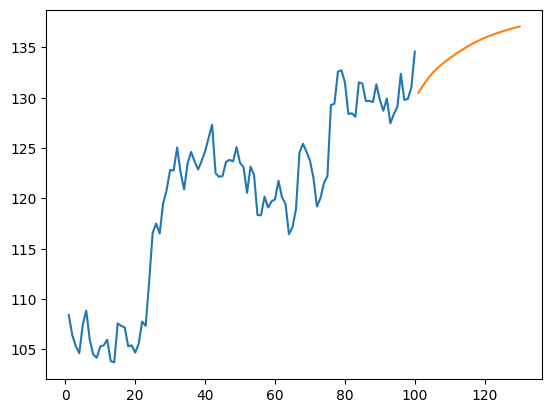

In [99]:
plt.plot(day_new,scaler.inverse_transform(df1[l-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

Incorporating the predicted values into our original data from 2020-01-01 to 2023-08-30 to Visualize well

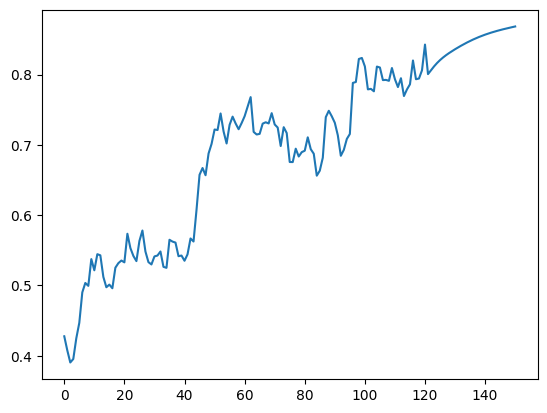

In [100]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[800:])

In [101]:
df3=scaler.inverse_transform(df3).tolist()

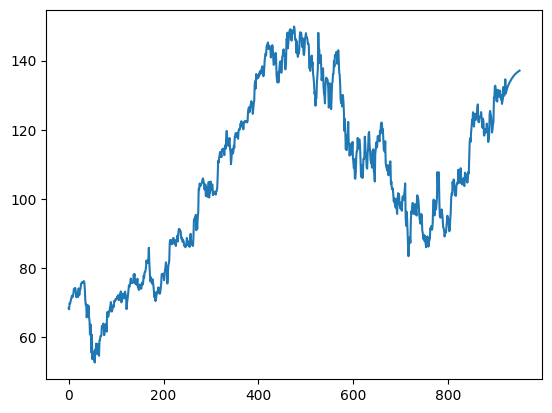

In [102]:
plt.plot(df3)

## Experimenting with time step = 150

In [104]:
# reshape into X=t,t+1,t+2,t+3 ...t+149 and Y=t+150
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [105]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [108]:
model1=Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model1.add(LSTM(50,return_sequences=True))
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [109]:
model1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 11s 546ms/step - loss: 0.2611 - val_loss: 0.0092
Epoch 2/100
7/7 [==============================] - 2s 332ms/step - loss: 0.0390 - val_loss: 0.0074
Epoch 3/100
7/7 [==============================] - 2s 331ms/step - loss: 0.0260 - val_loss: 0.0095
Epoch 4/100
7/7 [==============================] - 3s 404ms/step - loss: 0.0117 - val_loss: 0.0178
Epoch 5/100
7/7 [==============================] - 3s 437ms/step - loss: 0.0104 - val_loss: 0.0049
Epoch 6/100
7/7 [==============================] - 2s 339ms/step - loss: 0.0077 - val_loss: 0.0044
Epoch 7/100
7/7 [==============================] - 2s 332ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 8/100
7/7 [==============================] - 2s 334ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 9/100
7/7 [==============================] - 2s 361ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 10/100
7/7 [==============================] - 3s 464ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 11

In [110]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 65ms/step


In [111]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [112]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

118.18214808230785

In [113]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

110.48637977824038

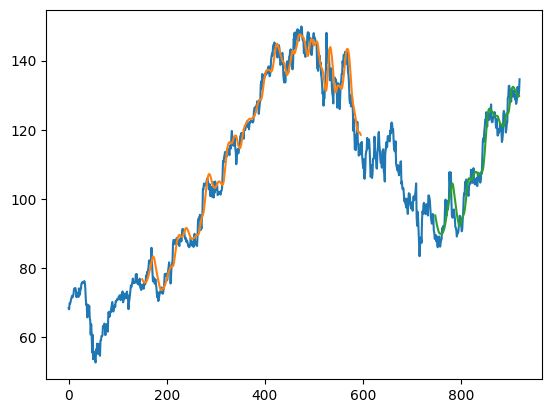

In [114]:
## Plotting
# shift train predictions for plotting
look_back=150
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [115]:
l=len(test_data)
x_input=test_data[l-150:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [120]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=150

i=0
while(i<30):

    if(len(temp_input)>150):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model1.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model1.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.39043257 0.39537433 0.42481881 0.44685067 0.49019374 0.50357762
 0.4994595  0.53755196 0.52159434 0.54455275 0.54290555 0.51222561
 0.49750337 0.50120968 0.49606204 0.52530065 0.53178664 0.53549294
 0.53291912 0.5735854  0.55320081 0.54197893 0.5346693  0.56339311
 0.57821832 0.54836203 0.53322797 0.52993349 0.54136124 0.5425967
 0.54836203 0.52653603 0.5250947  0.56504031 0.56246649 0.56102516
 0.54167009 0.5425967  0.53518409 0.5442439  0.56689346 0.56256947
 0.60786866 0.65749185 0.66716943 0.65687416 0.68775997 0.70145261
 0.72194025 0.72121959 0.74479576 0.71916049 0.70207038 0.7286322
 0.74026582 0.73058824 0.72235208 0.73110304 0.74088351 0.75467921
 0.76806301 0.7185428  0.71483649 0.71576311 0.7302794  0.73223552
 0.73058824 0.7452075  0.72914691 0.72471994 0.69846706 0.72523474
 0.71689552 0.67571444 0.67561155 0.69465778 0.68353887 0.68971601
 0.69177512 0.71082135 0.69393711 0.68745112 0.65625639 0.66336015
 0.68178869 0.73954515 0.74860496 0.74067764 0.73151

In [121]:
day_new=np.arange(1,151)
day_pred=np.arange(151,181)

In [122]:
l=len(df1)
l

921

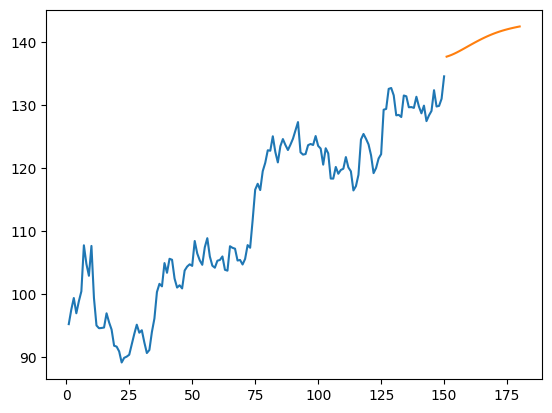

In [123]:
plt.plot(day_new,scaler.inverse_transform(df1[l-150:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

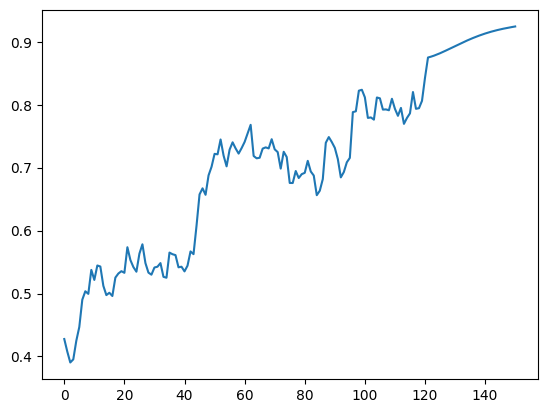

In [124]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[800:])

In [125]:
df3=scaler.inverse_transform(df3).tolist()

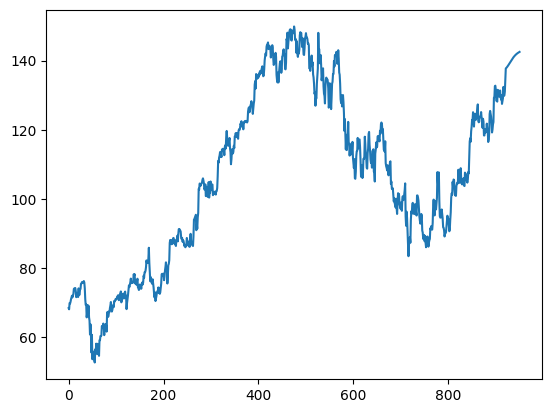

In [126]:
plt.plot(df3)

### For time step=150, model expect to have higher closing price for the next 30 days with respect to the model with time step =100